# Customer Segmentation by KMean, Spectral and GaussianMixture Clustring Models

# Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

# Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [3]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth ,SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture


In [4]:
#for loading data
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#for cheking details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#for checking shape of dataframe
df.shape

(200, 5)

In [8]:
#for checking the statical summary of data frame 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#for checking nul values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#for checking duplicate values 
df.duplicated().sum()

0

In [11]:
#for checking unique values
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [12]:
column_to_drop = 'CustomerID'
df.drop(column_to_drop, axis=1, inplace=True)

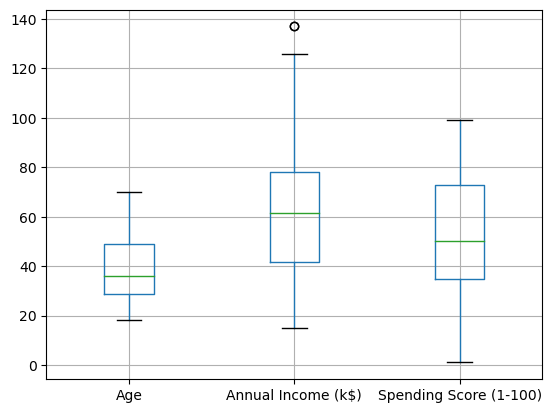

In [13]:
df.boxplot()
plt.show()

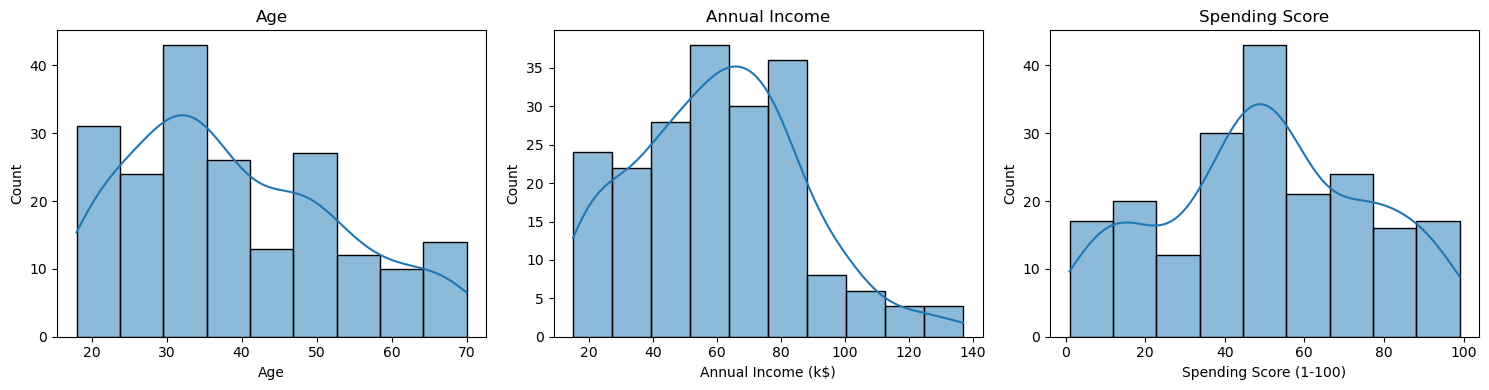

In [14]:
plt.figure(figsize=(15, 4))

# First Subplot: Age
plt.subplot(1, 3, 1)
sns.histplot(data=df['Age'], kde=True)
plt.title('Age')
plt.xlabel('Age')

# Second Subplot: Annual Income
plt.subplot(1, 3, 2)
sns.histplot(data=df['Annual Income (k$)'], kde=True)
plt.title('Annual Income')
plt.xlabel('Annual Income (k$)')

# Third Subplot: Spending Score
plt.subplot(1, 3, 3)
sns.histplot(data=df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score')
plt.xlabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()


# Proportion of gender

In [15]:
#show the totall count of gender-column
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

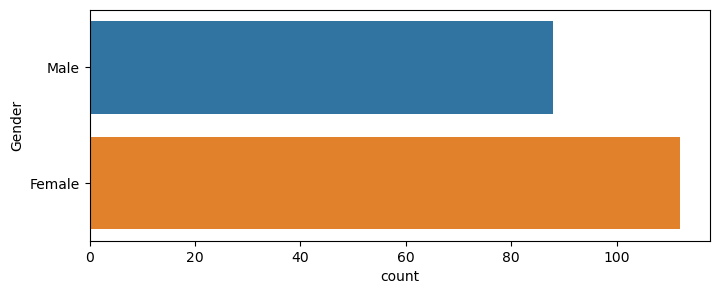

In [16]:
plt.figure(figsize = (8, 3))
sns.countplot(y = df['Gender'])
plt.show()

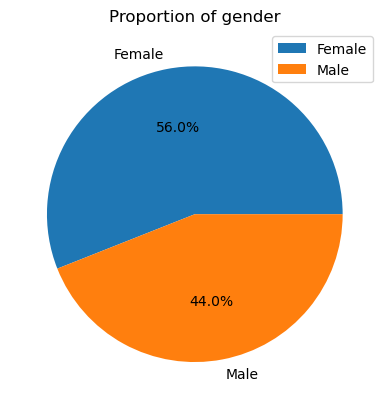

In [17]:
plt.pie(df['Gender'].value_counts(),labels = ["Female","Male"],autopct ="%.01f%%")
plt.legend(["Female","Male"])
plt.title('Proportion of gender')
plt.show()

# Spending Score by Gender

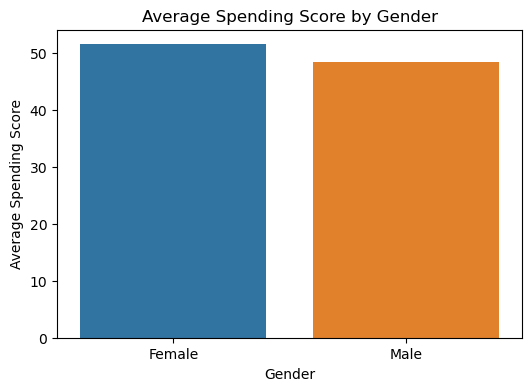

In [18]:
# Calculate the mean spending score for each gender
mean_scores = df.groupby('Gender')['Spending Score (1-100)'].mean()


plt.figure(figsize=(6, 4))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Gender')
plt.show()


# Spending Score by Age 

In [19]:
#create age groups
bin_edges = [18, 25, 35, 45, 55, 65, 70]
df['Age Group'] = pd.cut(df['Age'], bins=bin_edges, labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

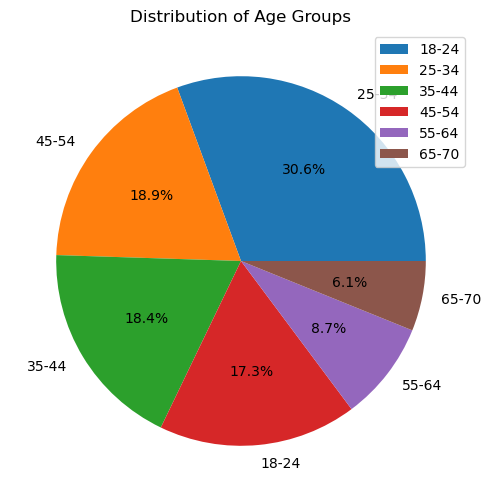

In [20]:
plt.figure(figsize=(8, 6))
plt.pie(df['Age Group'].value_counts(), labels=df['Age Group'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

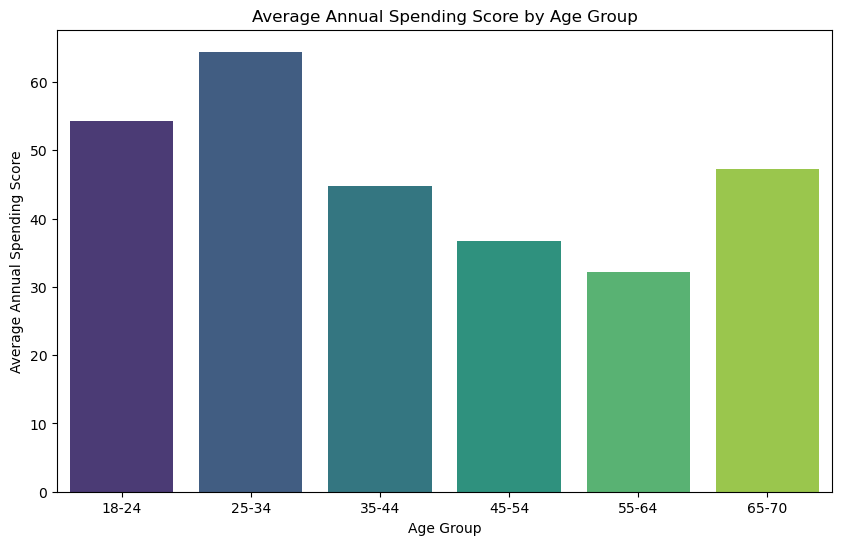

In [21]:
# Calculate the mean spending score for each age group
mean_scores = df.groupby('Age Group')['Spending Score (1-100)'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values,palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Average Annual Spending Score')
plt.title('Average Annual Spending Score by Age Group')
plt.show()


In [22]:
df1 = pd.DataFrame({'Age Group': df['Age Group']})
column_to_drop = 'Age Group'
df.drop(column_to_drop, axis=1, inplace=True)

In [23]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Model Building 

In [24]:
X= df.iloc[:, [2,3]].values

# Elbow method 

For checking the number of Clusters.

In [25]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


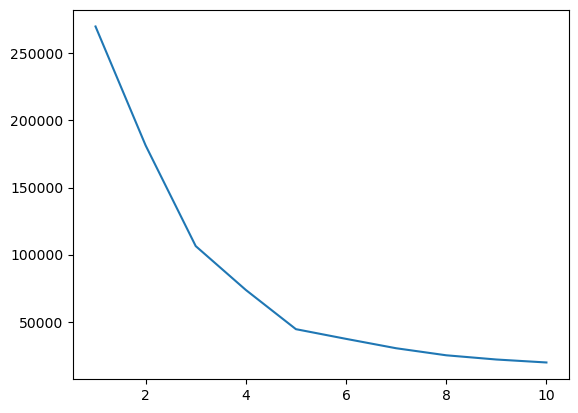

In [26]:
plt.plot(range(1,11),wcss)
plt.show()

# K-Mean

With 4 clucters

In [27]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

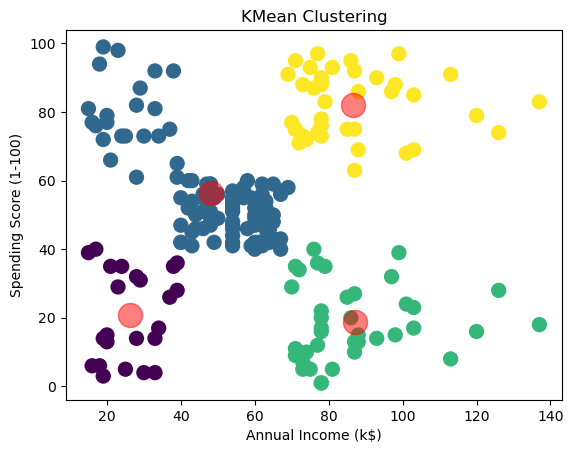

In [28]:
labels_km4 = km.labels_

# Get the cluster centroids
centroids_km4 = km.cluster_centers_

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels_km4, s=100)
plt.scatter(x=centroids_km4[:, 0], y=centroids_km4[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMean Clustering')
plt.show()


Evaluation 

Inertia (Within-Cluster Sum of Squares): Measures the distance between data points within the same cluster. Lower inertia is better.

Silhouette Score: Measures how similar each data point is to its own cluster compared to other clusters. A higher silhouette score indicates better cluster separation.

In [29]:
inertia_score = km.inertia_
print("inertia_score of 4 clucters:",inertia_score)

inertia_score of 4 clucters: 73679.78903948834


In [30]:
silhouette_km4 = silhouette_score(X, labels_km4)
print("Silhouette Score  of 4 clusters:", silhouette_km4)

Silhouette Score  of 4 clusters: 0.4931963109249047


# With 5 clucters

In [31]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

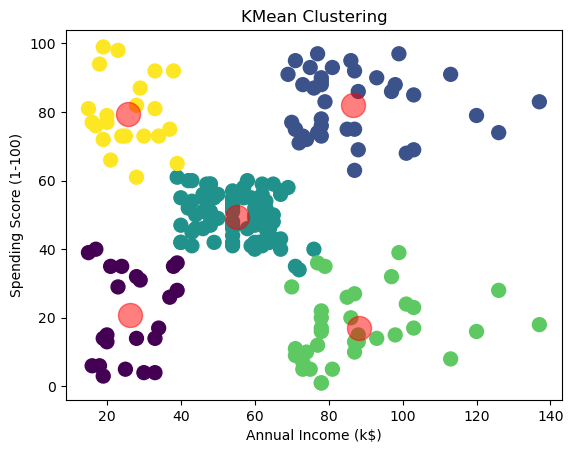

In [32]:
labels_km5 = km.labels_

# Get the cluster centroids
centroids_km5 = km.cluster_centers_

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels_km5, s=100)
plt.scatter(x=centroids_km5[:, 0], y=centroids_km5[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMean Clustering')
plt.show()


Evaluation 

In [33]:
inertia_score = km.inertia_
print("inertia_score of 5 clusters:",inertia_score)

inertia_score of 5 clusters: 44448.45544793371


In [34]:
silhouette_km5 = silhouette_score(X, labels_km5)
print("Silhouette Score  of 5 clusters:", silhouette_km5)

Silhouette Score  of 5 clusters: 0.553931997444648


# Spectral Clustering

With 4 clucters

In [35]:
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
y_spectral_4 = spectral.fit_predict(X)

D:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


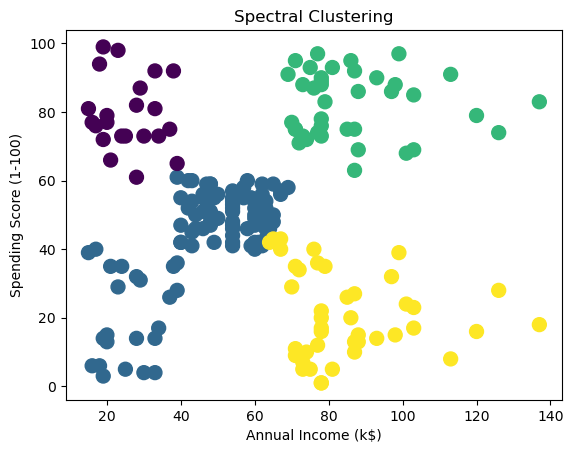

In [36]:
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=y_spectral_4, s=100)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('Spectral Clustering')
plt.show()

Evalution

In [37]:
silhouette_avg = silhouette_score(X, y_spectral_4)
print("Silhouette Score  of 4 clusters:", silhouette_avg)

Silhouette Score  of 4 clusters: 0.47365350837203984


# With 5 clucters

In [38]:
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors')
y_spectral_5 = spectral.fit_predict(X)


D:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


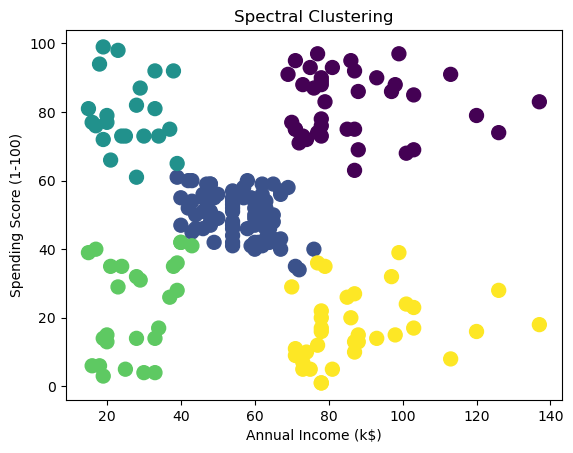

In [39]:
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=y_spectral_5, s=100)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('Spectral Clustering')
plt.show()

Evaluation

In [40]:
silhouette_avg = silhouette_score(X, y_spectral_5)
print("Silhouette Score  of 5 clusters:", silhouette_avg)

Silhouette Score  of 5 clusters: 0.5416865319025136


# GaussianMixture

With 4 cluster

In [41]:
gm = GaussianMixture(
                     n_components = 4,
                     n_init = 10,
                     max_iter = 100)

In [42]:
gm.fit(X)
label_gm4 = gm.predict(X)

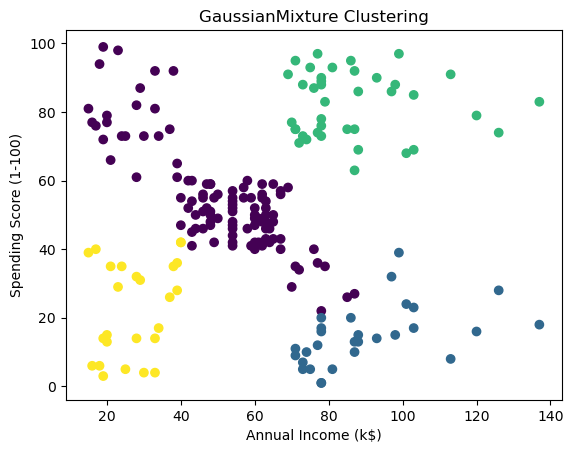

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=label_gm4, cmap='viridis')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('GaussianMixture Clustering')
plt.show()

Evaluation 

In [44]:
silhouette_4 = silhouette_score(X, label_gm4)
print("Silhouette Score  of 4 clusters:", silhouette_4)

Silhouette Score  of 4 clusters: 0.45009868296154987


# With 5 clusters

In [45]:
gm = GaussianMixture(
                     n_components = 5,
                     n_init = 10,
                     max_iter = 100)

In [46]:
gm.fit(X)
label_gm5 = gm.predict(X)

Evaluation

In [47]:
silhouette_5 = silhouette_score(X, label_gm5)
print("Silhouette Score  of 5 clusters:", silhouette_5)

Silhouette Score  of 5 clusters: 0.5528243704895652


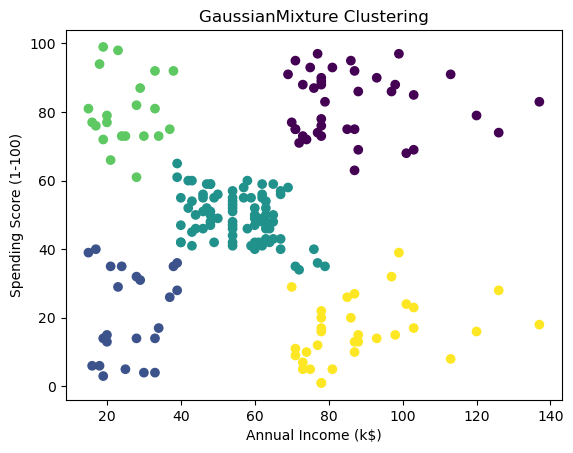

In [48]:
plt.scatter(X[:, 0], X[:, 1], c=label_gm5, cmap='viridis')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('GaussianMixture Clustering')
plt.show()

# Conclusion:

Note:                                                                                                                       
Silhouette Score: Measures how similar each data point is to its own cluster compared to other clusters. A higher silhouette score indicates better cluster separation.

Silhouette Score  of 4 clusters: 0.4931963109249047                                                                             
Silhouette Score  of 5 clusters: 0.553931997444648

Silhouette Score  of 4 clusters: 0.47365350837203984                                                                            
Silhouette Score  of 5 clusters: 0.5416865319025136

Silhouette Score  of 4 clusters: 0.45009868296154987                                                                            
Silhouette Score  of 5 clusters: 0.5528243704895652